1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn

import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [3]:
df_converted = pd.get_dummies(df)
df_converted.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
1,729.526495,44361.625074,1,0,1,0
2,817.180407,12106.134700,1,0,0,1
3,1073.549164,31767.138947,1,0,1,0
4,529.250605,35704.493935,1,0,1,0
5,785.655883,38463.495879,1,0,1,0


In [4]:
df_finalconversion = df_converted.drop(['default_No', 'student_No'], axis=1)
df_finalconversion.head()

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

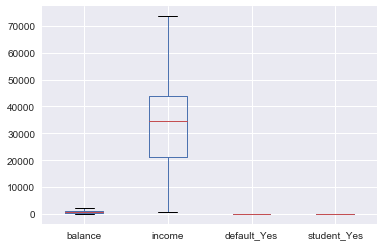

In [15]:
df_finalconversion.boxplot()
plt.show()

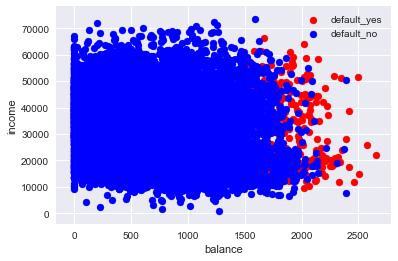

In [33]:
Yes = df_finalconversion[df_converted.default_Yes==1]
No = df_finalconversion[df_converted.default_Yes==0]
plt.scatter(x=Yes['balance'], y=Yes['income'], c='r', label='default_yes', alpha=1)
plt.scatter(x=No['balance'], y=No['income'], c='b', label='default_no', alpha=1)
plt.xlabel('balance')
plt.ylabel('income')
plt.legend()
plt.show()

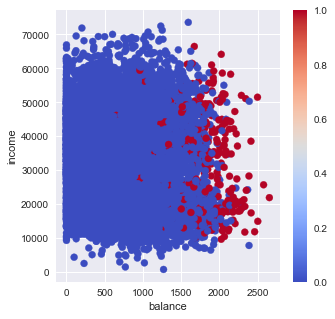

In [74]:
#plt.scatter(waterUsage['duration'], waterUsage['water_amount'],c=waterUsage['third_column'], cmap=plt.cm.autumn)
fig = plt.figure(figsize=(5,5))
y=df_converted['default_Yes']
n=df_converted['default_No']
plt.scatter(df_converted['balance'],df_converted['income'], c=df_converted['default_Yes'], cmap=plt.cm.coolwarm, marker='o')

plt.xlabel('balance')
plt.ylabel('income')
plt.colorbar()


plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
#y = df_converted['default_No']
#X = df_converted.drop(['default_No'],1) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#model=LogisticRegression(penalty='l2', C=1)
#model.fit(X_train, y_train)
#score=accuracy_score(y_test, model.predict(X_test))
#roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
#cr=classification_report(y_test, model.predict(X_test))
#print(roc)
#classifier = OneVsRestClassifier(LogisticRegression(penalty='l2')).fit(X_train, y_train)
#print('Coefficents: ', classifier.coef_)
#print('Intercept" ', classifier.intercept_)

#coef = classifier.coef_
#intercept = classifier.intercept_

# see the coutour approach for a more general solution
#ex1 = np.linspace(30, 100, 100)
#ex2 = -(coef[:, 0] * ex1 + intercept[:, 0]) / coef[:,1]

#plt.scatter(df_converted['balance'],df_converted['income'], c=df_converted['default_Yes'], cmap=plt.cm.coolwarm, marker='o')
#plt.plot(ex1, ex2, color='r', label='decision boundary');

In [24]:
X = df_finalconversion[['balance', 'income']]
y = df_converted.default_Yes

def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("AUC of ROC : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds, classifier

fpr, tpr, roc_auc, thresholds, clf = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')

AUC of ROC : 0.942479


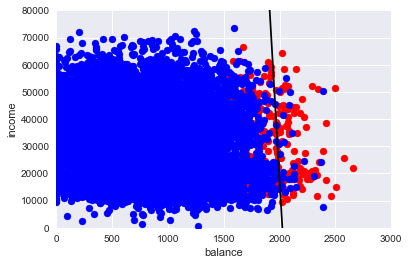

In [34]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

f, ax = plt.subplots()
ax.scatter(x=Yes['balance'], y=Yes['income'], c='r', label='default_yes', alpha=1)
ax.scatter(x=No['balance'], y=No['income'], c='b', label='default_no', alpha=1)
ax.plot(xx, yy, 'k-')
ax.set(xlim=(0, 3000), ylim=(0, 80000),xlabel="balance", ylabel="income")
plt.show()

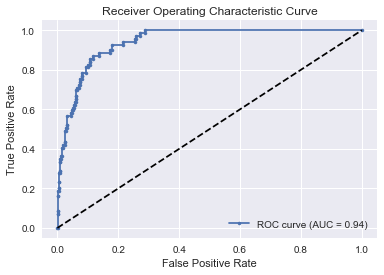

In [35]:
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

array([ 0.06434279,  0.00306681, -0.0028007 ])

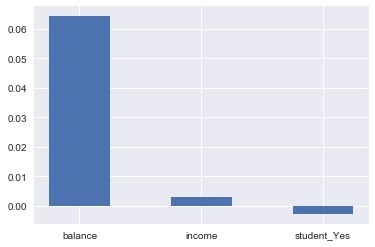

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X = df_finalconversion[['balance', 'income','student_Yes']]
y = df_converted.default_Yes
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-8, -1, 100)
scores = []

for alpha in alphas:
    regr_Lasso = Lasso(alpha=alpha)
    regr_Lasso.fit(X_train, y_train)
    scores.append(regr_Lasso.score(X_test,y_test))
    
regr_Ridge = Ridge(alpha=alphas[opt_index])
regr_Ridge.fit(X_train, y_train)
alpha_optimalregstrength = np.array(scores).argmax()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticklabels(('balance', 'income', 'student_Yes'))
ax.bar(np.arange(3), regr_Ridge.coef_, 0.5)
ax.set_xticks(np.arange(3))
regr_Ridge.coef_

In [ ]:
"""As seen above, being a student gives a coefficient of -0.0028 and thus it is a negative indicator of what we are trying 
to predict. Therefore, this variable improves performance by indicating that being a student increases the likelihood of them 
defaulting"""

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

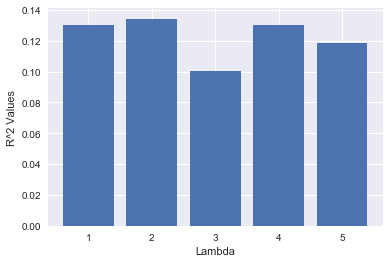

1e-08


In [73]:
from sklearn.model_selection import cross_val_score

regr_Ridge = Ridge(alpha=alphas[alpha_optimalregstrength])
scores = cross_val_score(regr_Ridge, X, y, cv=5)
plt.xlabel('Lambda')
plt.ylabel('R^2 Values')

plt.bar(range(1,6),scores)
plt.show()
print(str(alphas[alpha_optimalregstrength]))

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

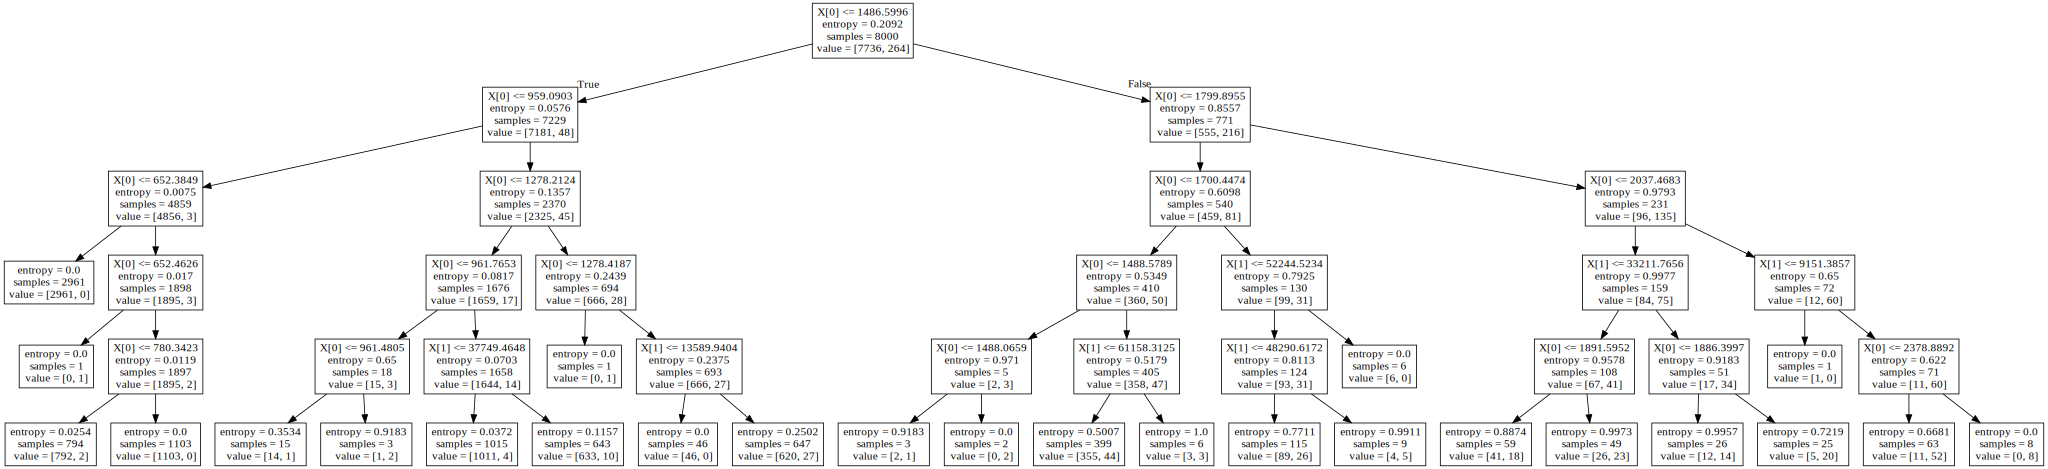

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
import graphviz
X = df_finalconversion[['balance', 'income','student_Yes']]
y = df_converted.default_Yes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_tree = DecisionTreeClassifier(criterion='entropy',  max_depth=5)
reg_tree.fit(X_train, y_train)
dot_data=export_graphviz(reg_tree, out_file='Reg_Tree.dot')
with open("Reg_Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format='png')

8) Find the optimal decision tree depth and compute the AUC ROC. 

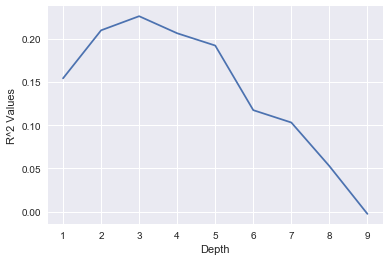

Optimal decision tree depth = 3
AUC of ROC : 0.932152


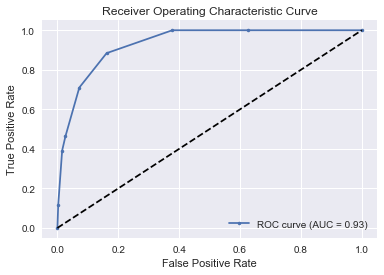

In [76]:
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]

depths = range(1,10)
for n in depths:
    regr_DecisionTree = DecisionTreeRegressor(max_depth=n)
    regr_DecisionTree.fit(X_train, y_train)
    train_errors.append(regr_DecisionTree.score(X_train,y_train))
    scores.append(regr_DecisionTree.score(X_test,y_test))
    
plt.ylabel('R^2 Values')
plt.xlabel('Depth')
plt.plot(depths,scores)
plt.show()
test_errors=scores
optimal=depths[np.argmax(scores)]
print ("Optimal decision tree depth = %d" %optimal)

reg_opt = DecisionTreeClassifier(criterion='entropy', max_depth= optimal)
reg_opt.fit(X_train,y_train)
probas_ = reg_opt.predict_proba(X_test)    
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_tree = auc(fpr,tpr)
print ("AUC of ROC : %f" % roc_auc_tree)
generate_ROCplot(fpr,tpr,'LR',roc_auc)